In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')


Mounted at /content/gdrive/


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##데이터 불러오기
 주요 판매처인 Southeast기준으로 가장 많이 판매된 top5를 분석하기 위한 데이터셋 만들기

In [3]:
customers=pd.read_csv('/content/gdrive/MyDrive/MainQuest04/olist_customers_dataset.csv')

In [4]:
order_items=pd.read_csv('/content/gdrive/MyDrive/MainQuest04/olist_order_items_dataset.csv')

In [5]:
orders=pd.read_csv('/content/gdrive/MyDrive/MainQuest04/olist_orders_dataset.csv')

In [6]:
products=pd.read_csv('/content/gdrive/MyDrive/MainQuest04/olist_products_dataset.csv')

In [7]:
category=pd.read_csv('/content/gdrive/MyDrive/MainQuest04/product_category_name_translation.csv')

##카테고리 이름 영어로 변경
(제품 카테고리명이 포르투갈어로 되어 있음, 영어로 번역된 데이터셋으로 대체)

In [8]:
products = products.merge(category, left_on='product_category_name',right_on='product_category_name', how='left')

In [9]:
products = products.drop(['product_category_name'], axis=1)

##병합
1.주문 테이블 + 주문 상품 테이블

In [10]:
order_products_merged=order_items.merge(products, on='product_id',how='left')

In [11]:
order_products_merged

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,31.0,232.0,1.0,8950.0,45.0,26.0,38.0,computers_accessories
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,43.0,869.0,1.0,967.0,21.0,24.0,19.0,sports_leisure
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,56.0,1306.0,1.0,100.0,20.0,20.0,20.0,computers_accessories


2.주문 테이블 + 고객 테이블

In [12]:
customers=customers.merge(orders,on='customer_id',how='left')

In [13]:
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00


3. 1과2를 병합

(고객별 주문 내역과 주문 상품이 포함된 테이블 생성)



In [14]:
customers_orders=customers.merge(order_products_merged,on='order_id',how='left')

In [15]:
customers_orders

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,124.99,21.88,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,289.00,46.48,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,139.94,17.79,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,149.94,23.36,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,230.00,22.25,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,home_confort
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,...,74.90,13.88,51.0,489.0,2.0,611.0,22.0,22.0,23.0,books_general_interest
113421,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,...,114.90,14.16,51.0,1193.0,1.0,1211.0,25.0,24.0,22.0,sports_leisure
113422,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,...,37.00,19.04,60.0,575.0,1.0,870.0,25.0,20.0,18.0,health_beauty
113423,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,...,689.00,22.07,59.0,452.0,1.0,710.0,19.0,13.0,14.0,watches_gifts


##필요한 컬럼만 남기기
(가설 검증에 불필요한 상품의 무게,배송 날짜 등의 컬럼 삭제)

In [16]:
# 필요한 컬럼 선택
selected_columns = [
    'order_id',
    'customer_unique_id',
    'customer_zip_code_prefix',
    'customer_city',
    'customer_state',
    'order_item_id',
    'product_id',
    'product_category_name_english'
]

# 새로운 데이터프레임 생성
customers_orders_new= customers_orders[selected_columns]


In [17]:
customers_orders_new

,order_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,product_category_name_english
0,00e7ee1b050b8499577073aeb2a297a1,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1.0,a9516a079e37a9c9c36b9b78b10169e8,office_furniture
1,29150127e6685892b6eab3eec79f59c7,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1.0,4aa6014eceb682077f9dc4bffebc05b0,housewares
2,b2059ed67ce144a36e2aa97d2c9e9ad2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1.0,bd07b66896d6f1494f5b86251848ced7,office_furniture
3,951670f92359f4fe4a63112aa7306eba,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1.0,a5647c44af977b148e0a3a4751a09e2e,office_furniture
4,6b7d50bd145f6fc7f33cebabd7e49d0f,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,1.0,9391a573abe00141c56e38d84d7d5b3b,home_confort
...,...,...,...,...,...,...,...,...
113420,6760e20addcf0121e9d58f2f1ff14298,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,1.0,ccb4503d9d43d245d3b295d0544f988b,books_general_interest
113421,9ec0c8947d973db4f4e8dcf1fbfa8f1b,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,1.0,9ede6b0570a75a4b9de4f383329f99ee,sports_leisure
113422,fed4434add09a6f332ea398efd656a5c,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,1.0,7a5d2e1e131a860ae7d18f6fffa9d689,health_beauty
113423,e31ec91cea1ecf97797787471f98a8c2,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,1.0,f819f0c84a64f02d3a5606ca95edd272,watches_gifts


In [18]:
# 결측치의 총 갯수 확인하기
customers_orders_new.isna().sum()

,0
order_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0
order_item_id,775
product_id,775
product_category_name_english,2402


결측치 날리기
*  order_item, product_id가 널값인것이 category널값이기도함

*   따라서 결측치 모두 drop





In [19]:
customers_orders_new=customers_orders_new.dropna()

In [20]:
customers_orders_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111023 entries, 0 to 113424
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       111023 non-null  object 
 1   customer_unique_id             111023 non-null  object 
 2   customer_zip_code_prefix       111023 non-null  int64  
 3   customer_city                  111023 non-null  object 
 4   customer_state                 111023 non-null  object 
 5   order_item_id                  111023 non-null  float64
 6   product_id                     111023 non-null  object 
 7   product_category_name_english  111023 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 7.6+ MB


In [21]:
customers_orders_new['customer_state'].unique()

array(['SP', 'SC', 'PR', 'MG', 'RJ', 'RS', 'PA', 'GO', 'ES', 'BA', 'MA',
       'MS', 'CE', 'DF', 'RN', 'PE', 'MT', 'AM', 'AP', 'AL', 'RO', 'PB',
       'TO', 'PI', 'AC', 'SE', 'RR'], dtype=object)

state의 수가 27개로 너무 많아서,  

*   북부 (North)	AC,AM, AP, PA, RO, RR, TO
*   북동부 (Northeast)	AL, BA, CE, MA, PB, PE, PI, RN, SE
*   중서부 (Central-West)	DF, GO, MT, MS
*   남동부 (Southeast)	ES, MG, RJ, SP
*   남부 (South)	PR, RS, SC

지역별로 추려서 5개의 그룹으로 그룹할 예정






In [22]:
# 주(State)별 지역 그룹화
region_mapping = {
    "North": ["AC", "AM", "AP", "PA", "RO", "RR", "TO"],
    "Northeast": ["AL", "BA", "CE", "MA", "PB", "PE", "PI", "RN", "SE"],
    "Central-West": ["DF", "GO", "MT", "MS"],
    "Southeast": ["ES", "MG", "RJ", "SP"],
    "South": ["PR", "RS", "SC"]
}

# 데이터프레임에 지역 추가
customers_orders_new["region"] = customers_orders_new["customer_state"].map(lambda x: next((k for k, v in region_mapping.items() if x in v), "Unknown"))

# 1. 지역(Region)별 인기 제품 분석
region_popular_products = customers_orders_new.groupby(['region', 'product_category_name_english']).size().reset_index(name='purchase_count')

# 각 지역에서 가장 많이 판매된 제품 카테고리 찾기
top_products_per_region = region_popular_products.sort_values(['region', 'purchase_count'], ascending=[True, False]).groupby('region').head(5).reset_index()

# 2. 특정 지역 고객의 구매 패턴 분석
# 고객이 구매한 제품과 지역별 인기 제품 매칭
customer_purchases = customers_orders_new.merge(top_products_per_region, on='region', suffixes=('_customer', '_region'))




<ipython-input-22-a202e2482f22>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_orders_new["region"] = customers_orders_new["customer_state"].map(lambda x: next((k for k, v in region_mapping.items() if x in v), "Unknown"))


In [23]:
top_products_per_region
#각 지역에서 가장 많이 판매된 카테고리

,index,region,product_category_name_english,purchase_count
0,39,Central-West,health_beauty,630
1,7,Central-West,bed_bath_table,578
2,61,Central-West,sports_leisure,542
3,35,Central-West,furniture_decor,420
4,13,Central-West,computers_accessories,405
5,102,North,health_beauty,212
6,80,North,computers_accessories,174
7,121,North,sports_leisure,166
8,124,North,telephony,145
9,126,North,watches_gifts,145


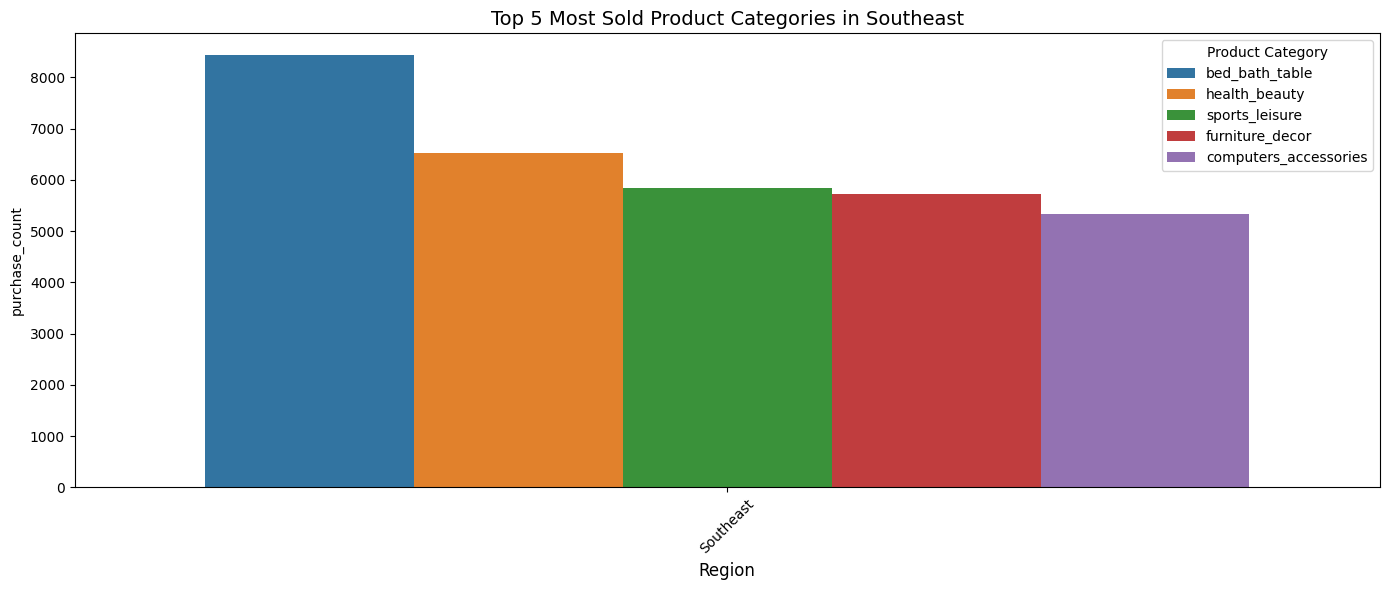

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# "Southeast"가 포함된 모든 지역 데이터 필터링
southeast_data = top_products_per_region[top_products_per_region['region'].str.contains("Southeast")]

# 그래프 크기 설정
fig, ax = plt.subplots(figsize=(14, 6))  # 단일 플롯이므로 axes가 아닌 ax 사용

# Southeast 지역 그래프
sns.barplot(
    data=southeast_data,
    x='region',
    y='purchase_count',
    hue='product_category_name_english',
    dodge=True,
    ax=ax  # 단일 플롯이므로 ax 사용
)

# 그래프 제목 및 라벨
ax.set_title("Top 5 Most Sold Product Categories in Southeast", fontsize=14)
ax.set_xlabel("Region", fontsize=12)
ax.tick_params(axis='x', rotation=45)
ax.legend(title="Product Category")

# 레이아웃 조정 및 출력
plt.tight_layout()
plt.show()

